<a href="https://colab.research.google.com/github/faridaarum/fuzzy-logic/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("https://github.com/HarvianKhusnan/Tugas-Fuzzy-logic/blob/dc01595f4ddf60a5b3d9678639cb4449de60c8b1/bengkel.xlsx?raw=true")
data.sample(10)

,id,servis,harga
38,39,52,7
54,55,50,7
66,67,27,4
21,22,79,9
88,89,48,2
20,21,48,2
75,76,45,5
97,98,27,10
36,37,31,4
90,91,98,3


**FUZIFIKASI**
**Membership Function**

**Fungsi Keanggotaan Kualitas Servis**

Misalkan nilai kualitas servis adalah x


*   x  ≤ 20 diartikan sangat jelek 
*   30 ≤ x ≤ 45 diartikan Jelek 
*   60 ≤ x ≤ 70 diartikan baik
*   x ≥ 80 diartikan sangat baik




In [ ]:
def fuzzy_kualitas(x) : 
  kualitas = {'Sangat Jelek' : 0, 'Jelek' : 0, 'Baik' : 0, 'Sangat Baik' : 0 }

  a,b,c,d,e,f = 20,30,45,60,70,80 

  #garis datar 
  if x <= a:
        kualitas['Sangat Jelek'] = 1
  if b <= x <= c:
        kualitas['Jelek'] = 1
  if d <= x <= e:
        kualitas['Baik'] = 1
  if x >= f:
        kualitas['Sangat Baik'] = 1
  # Garis Miring (Gradient)   
  if a < x <= b:
       kualitas['Sangat Jelek'] = -(x - b) / (b - a)
  if a < x < b:
       kualitas['Jelek'] = (x - a) / (b - a)
  if c < x <= d:
       kualitas['Jelek'] = -(x - d) / (d - c)
  if c < x < d:
       kualitas['Baik'] = (x - c) / (d - c)
  if e < x < f:
       kualitas['Baik'] = -(x - f) / (f - e)
  if e < x <= f:
      kualitas['Sangat Baik'] = (x - e) / (f - e)
        
  return kualitas

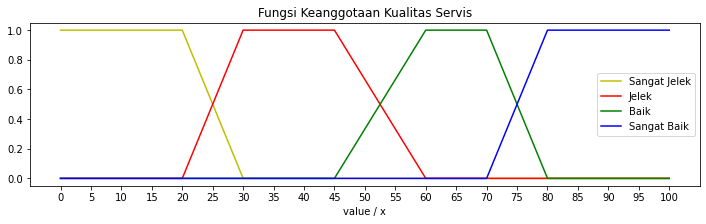

In [ ]:
plt.figure(figsize=(12, 3))
plt.title("Fungsi Keanggotaan Kualitas Servis")

plt.plot(range(101), [fuzzy_kualitas(x)['Sangat Jelek'] for x in range(101)], 'y')
plt.plot(range(101), [fuzzy_kualitas(x)['Jelek'] for x in range(101)], 'r')
plt.plot(range(101), [fuzzy_kualitas(x)['Baik'] for x in range(101)], 'g')
plt.plot(range(101), [fuzzy_kualitas(x)['Sangat Baik'] for x in range(101)], 'b')

plt.plot(0, 0, 'y', linewidth=1.5, label='Sangat Jelek')
plt.plot(0, 0, 'r', linewidth=1.5, label='Jelek')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Baik')

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("value / x")
plt.legend()
plt.show()

Fungsi Keanggotaan Harga 

Misalkan nilai Harga adalah x

*   x ≤ 3 diartikan sangat murah 
*   4 ≤ x  ≤ 6 diartikan normal 
*   7 ≤ x  ≤ 8 diartikan Mahal 
*   x ≥ 9 diartikan sangat mahal



In [ ]:
def harga(x) : 
  harga = {'Sangat murah' : 0, 'Normal' : 0, 'Mahal' : 0, 'Sangat Mahal' : 0}
  a,b,c,d,e,f = 3,4,6,7,8,9
  #Garis datar 
  if x <= a:
      harga['Sangat murah'] = 1
  if b <= x <= c:
      harga['Normal'] = 1
  if d <= x <= e:
      harga['Mahal'] = 1
  if x >= f:
      harga['Sangat Mahal'] = 1
  
  #garis miring 
  if a < x <= b:
        harga['Sangat murah'] = -(x - b) / (b - a)
  if a < x < b:
        harga['Normal'] = (x - a) / (b - a)
  if c < x <= d:
        harga['Normal'] = -(x - d) / (d - c)
  if c < x < d:
        harga['Mahal'] = (x - c) / (d - c)
  if e < x < f:
        harga['Mahal'] = -(x - f) / (f - e)
  if e < x <= f:
        harga['Sangat Mahal'] = (x - e) / (f - e)
        
  return harga



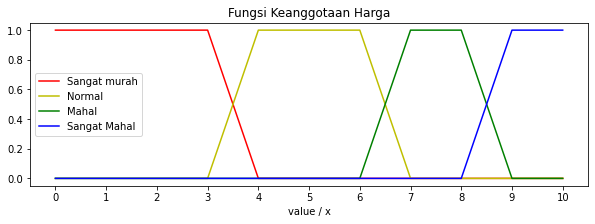

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan Harga")

plt.plot(range(11), [harga(x)['Sangat murah'] for x in range(11)], 'r')
plt.plot(range(11), [harga(x)['Normal'] for x in range(11)], 'y')
plt.plot(range(11), [harga(x)['Mahal'] for x in range(11)], 'g')
plt.plot(range(11), [harga(x)['Sangat Mahal'] for x in range(11)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Sangat murah')
plt.plot(0, 0, 'y', linewidth=1.5, label='Normal')
plt.plot(0, 0, 'g', linewidth=1.5, label='Mahal')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Mahal')

plt.xticks(list(range(11)))
plt.xlabel("value / x")
plt.legend()
plt.show()

**Proses Fuzzifikasi**


In [ ]:
fuzzify = []

for kualitas_beng, harga_beng in zip(data['servis'], data['harga']):
    fuzzifyy = {'kualitas': 0, 'harga': 0}

    fuzzifyy['kualitas'] = fuzzy_kualitas(kualitas_beng)
    fuzzifyy['harga'] = harga(harga_beng)

    fuzzify.append(fuzzifyy)

In [ ]:
print("Contoh Hasil Fuzzifikasi :\n")
for i in range(0, 20, 2):
    print("Kualitas :", fuzzify[i]['kualitas'])
    print("Harga   :", fuzzify[i]['harga'], end="\n\n")

Contoh Hasil Fuzzifikasi :

Kualitas : {'Sangat Jelek': 0, 'Jelek': 0.13333333333333333, 'Baik': 0.8666666666666667, 'Sangat Baik': 0}
Harga   : {'Sangat murah': 0, 'Normal': 0.0, 'Mahal': 1, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 0, 'Jelek': 0, 'Baik': 0, 'Sangat Baik': 1}
Harga   : {'Sangat murah': 1, 'Normal': 0, 'Mahal': 0, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 1, 'Jelek': 0, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat murah': 0.0, 'Normal': 1, 'Mahal': 0, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 0, 'Jelek': 0, 'Baik': 1, 'Sangat Baik': 0}
Harga   : {'Sangat murah': 0, 'Normal': 0, 'Mahal': 1, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 0, 'Jelek': 1, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat murah': 1, 'Normal': 0, 'Mahal': 0, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 1, 'Jelek': 0, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat murah': 0, 'Normal': 1, 'Mahal': 0, 'Sangat Mahal': 0}

Kualitas : {'Sangat Jelek': 0, 'Jelek': 0, 'Baik': 

Inferensi 

Fuzzy Set Rules (Konjungsi)

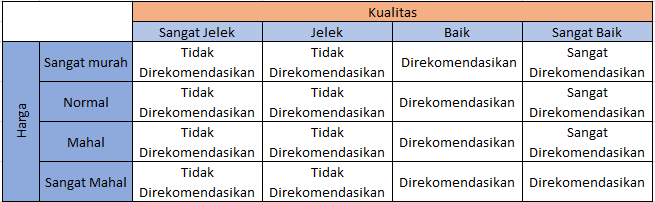

In [ ]:
#aturan inferensi
set_rules = {
    ('Sangat Jelek', 'Sangat murah') : 'Tidak Direkomendasikan',
    ('Jelek', 'Sangat murah') : 'Tidak Direkomendasikan',
    ('Baik', 'Sangat murah') : 'Direkomendasikan',
    ('Sangat Baik', 'Sangat murah') : 'Sangat Direkomendasikan',
    ('Sangat Jelek', 'Normal') : 'Tidak Direkomendasikan', 
    ('Jelek', 'Normal') : 'Tidak Direkomendasikan', 
    ('Baik','Normal') : 'Direkomendasikan',
    ('Sangat Baik', 'Normal') :'Sangat Direkomendasikan', 
    ('Sangat Jelek', 'Mahal') : 'Tidak Direkomendasikan', 
    ('Jelek', 'Mahal') : 'Tidak Direkomendasikan', 
    ('Baik','Mahal') : 'Direkomendasikan',
    ('Sangat Baik', 'Mahal') : 'Sangat Direkomendasikan', 
    ('Sangat Jelek', 'Sangat Mahal') : 'Tidak Direkomendasikan', 
    ('Jelek', 'Sangat Mahal') : 'Tidak Direkomendasikan', 
    ('Baik', 'Sangat Mahal') : 'Direkomendasikan',
    ('Sangat Baik', 'Sangat Mahal') : 'Direkomendasikan',

}

In [ ]:
inference_result = []

def inference(fuzzed):
    result = {'Tidak Direkomendasikan': 0, "Direkomendasikan": 0, "Sangat Direkomendasikan": 0}

    for kualitas in fuzzed['kualitas'].keys():
        for harga in fuzzed['harga'].keys():
            min_value = min(fuzzed['kualitas'][kualitas], fuzzed['harga'][harga])

            # Proses Conjunction Sesuai Fuzzy Rules pada variabel fuzzy_set_rules
            hasil = set_rules[(kualitas, harga)]

            if min_value > result[hasil]:
               result[hasil] = min_value

    return result

In [ ]:
for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

print("Contoh Hasil Inferensi :\n")
for i in range(0, 40, 2):
    print(inference_result[i])

Contoh Hasil Inferensi :

{'Tidak Direkomendasikan': 0.13333333333333333, 'Direkomendasikan': 0.8666666666666667, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1.0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0.2, 'Sangat Direkomendasikan': 0.8}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0.8, 'Direkomendasikan': 0.2, 'Sangat Direkomendasikan': 0}
{'Tidak Direkome

**DEFUZZIFIKASI**

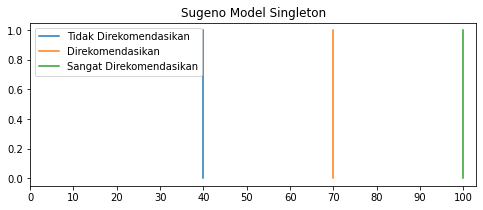

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([40, 40], [0, 1], label="Tidak Direkomendasikan")
plt.plot([70, 70], [0, 1], label="Direkomendasikan")
plt.plot([100, 100], [0, 1], label="Sangat Direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [ ]:
deffuzy = {'Tidak Direkomendasikan': 40, "Direkomendasikan": 70, "Sangat Direkomendasikan": 100}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

final = []

for inference in inference_result:
    final.append(defuzzification(inference, deffuzy))

In [ ]:
print("Contoh Hasil Defuzifikasi:\n")
for i in range(0, 40, 5):
    print(f'Data Ke-{i+1} = {final[i]}')

Contoh Hasil Defuzifikasi:

Data Ke-1 = 66.0
Data Ke-6 = 68.0
Data Ke-11 = 40.0
Data Ke-16 = 100.0
Data Ke-21 = 46.0
Data Ke-26 = 40.0
Data Ke-31 = 70.0
Data Ke-36 = 40.0


**HASIL**

In [ ]:
data['result'] = final
data = data.sort_values(by='result', ascending=False)[:10]

data['id'].to_excel('peringkat.xls', index=False, header=False)  
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  after removing the cwd from sys.path.


,id,servis,harga,result
12,13,80,3,100.0
2,3,98,2,100.0
51,52,94,3,100.0
33,34,93,4,100.0
91,92,83,3,100.0
90,91,98,3,100.0
15,16,82,6,100.0
59,60,79,6,97.0
69,70,78,8,94.0
62,63,78,7,94.0
